In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt


import re

from math import sqrt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.fecha = pd.to_datetime(df.fecha)

In [4]:
df['year'] = df.fecha.dt.year
df['mes'] = df.fecha.dt.month
df['dia_del_mes'] = df.fecha.dt.day
df['dia_del_anio'] = df.fecha.dt.dayofyear
df['quarter'] = df.fecha.dt.quarter

In [5]:
df.shape

(240000, 28)

In [6]:
mean_met = df.groupby(df.tipodepropiedad).agg({'metroscubiertos': 'mean','metrostotales': 'mean','gimnasio':'mean','usosmultiples':'mean','piscina':'mean','escuelascercanas':'mean','centroscomercialescercanos':'mean','garages':'mean', 'banos':'mean'})

In [7]:
mean_met.metroscubiertos.fillna(0, inplace=True)
mean_met.banos.fillna(0,inplace=True)

In [8]:
mean_met.head()

,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,garages,banos
tipodepropiedad,,,,,,,,,
Apartamento,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
Bodega comercial,251.153639,261.715040,0.000000,0.000000,0.000000,0.156472,0.168563,0.484677,1.847185
Casa,194.026911,183.767889,0.043079,0.035980,0.064276,0.455506,0.385564,1.705926,2.240429
Casa en condominio,187.697231,169.728656,0.065399,0.098824,0.154065,0.498730,0.459605,1.908157,2.366065
Casa uso de suelo,254.068966,228.425710,0.000000,0.000000,0.000000,0.326271,0.316384,1.427350,2.404719


In [9]:
mean_met = mean_met.rename(columns = {"metroscubiertos": "mean_metroscubiertos", "metrostotales": "mean_metrostotales","gimnasio":"mean_gimnasio", "usosmultiples":"mean_usosmultiples","piscina":"mean_piscina","escuelascercanas":"mean_escuelascercanas","centroscomercialescercanos":"mean_centroscomercialescercanos","garages":"mean_garages","banos":"mean_banos"})

In [10]:
mean_met.reset_index()

,tipodepropiedad,mean_metroscubiertos,mean_metrostotales,mean_gimnasio,mean_usosmultiples,mean_piscina,mean_escuelascercanas,mean_centroscomercialescercanos,mean_garages,mean_banos
0,Apartamento,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
1,Bodega comercial,251.153639,261.715040,0.000000,0.000000,0.000000,0.156472,0.168563,0.484677,1.847185
2,Casa,194.026911,183.767889,0.043079,0.035980,0.064276,0.455506,0.385564,1.705926,2.240429
3,Casa en condominio,187.697231,169.728656,0.065399,0.098824,0.154065,0.498730,0.459605,1.908157,2.366065
4,Casa uso de suelo,254.068966,228.425710,0.000000,0.000000,0.000000,0.326271,0.316384,1.427350,2.404719
5,Departamento Compartido,127.654676,130.405941,0.241135,0.184397,0.184397,0.609929,0.666667,1.401460,1.791045
6,Duplex,100.215976,100.283019,0.000000,0.000000,0.000000,0.011662,0.008746,1.181548,1.360947
7,Edificio,291.231944,231.461169,0.000000,0.000716,0.000716,0.305874,0.313754,0.725086,2.626703
8,Garage,40.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Hospedaje,288.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
mean_met.shape

(24, 9)

In [12]:
df.shape

(240000, 28)

In [13]:
df = pd.merge(df, mean_met, on='tipodepropiedad', how='outer')

In [14]:
df.shape

(240000, 37)

In [15]:
len(df.tipodepropiedad.value_counts())

24

In [16]:
len(df.provincia.value_counts())

32

In [17]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'year', 'mes', 'dia_del_mes',
       'dia_del_anio', 'quarter', 'mean_metroscubiertos', 'mean_metrostotales',
       'mean_gimnasio', 'mean_usosmultiples', 'mean_piscina',
       'mean_escuelascercanas', 'mean_centroscomercialescercanos',
       'mean_garages', 'mean_banos'],
      dtype='object')

In [18]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,quarter,mean_metroscubiertos,mean_metrostotales,mean_gimnasio,mean_usosmultiples,mean_piscina,mean_escuelascercanas,mean_centroscomercialescercanos,mean_garages,mean_banos
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,3,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
1,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,2,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
2,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,1,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
3,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,1,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817
4,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,NaN,3.0,2.0,...,4,117.048657,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817


In [19]:
df['metro_promedio_por_habitacion'] = df.metroscubiertos / (df.habitaciones + df.banos +1 - df.garages) #El 1 representa el ambiente en comun

In [20]:
df['aire_libre'] = df.metrostotales - df.metroscubiertos

In [21]:
df.shape

(240000, 39)

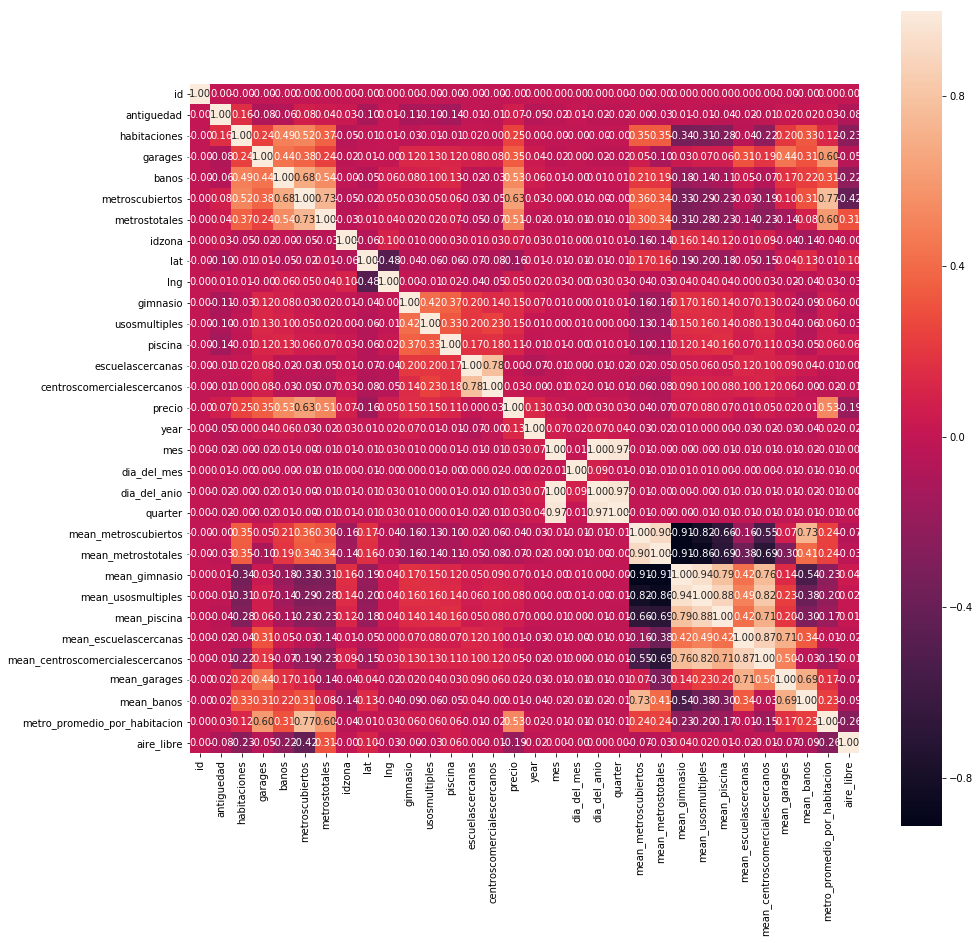

In [22]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [23]:
filterCol = ['id','titulo','descripcion','direccion','ciudad','idzona','lat','lng','fecha']

In [24]:
X = df.drop(['precio'] + filterCol,axis = 1)
y = df['precio']

In [25]:
X.head()

,tipodepropiedad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,...,mean_metrostotales,mean_gimnasio,mean_usosmultiples,mean_piscina,mean_escuelascercanas,mean_centroscomercialescercanos,mean_garages,mean_banos,metro_promedio_por_habitacion,aire_libre
0,Apartamento,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,0.0,0.0,...,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817,20.000000,0.0
1,Apartamento,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,0.0,0.0,...,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817,31.666667,0.0
2,Apartamento,Distrito Federal,5.0,2.0,1.0,1.0,75.0,90.0,0.0,0.0,...,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817,25.000000,15.0
3,Apartamento,Colima,1.0,2.0,1.0,1.0,58.0,NaN,0.0,0.0,...,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817,19.333333,NaN
4,Apartamento,Nuevo León,NaN,3.0,2.0,4.0,256.0,NaN,0.0,0.0,...,117.907762,0.132383,0.107898,0.141173,0.458921,0.450847,1.410242,1.816817,42.666667,NaN


In [26]:
X.shape

(240000, 29)

In [27]:
X = pd.get_dummies(X, dummy_na=False)

In [28]:
X.shape

(240000, 83)

In [29]:
y.shape

(240000,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
parametros = {
 'objective':'reg:gamma',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'nthread': 4,
 'random_state': 0,
 'subsample': 1,
 'eval_metric' : 'mae'             
}

In [32]:
model = XGBRegressor(**parametros)

In [33]:
%%time
model.fit(X_train.as_matrix(), y_train.as_matrix())

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


CPU times: user 17min 30s, sys: 15.9 s, total: 17min 45s
Wall time: 4min 26s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=1, nthread=4, objective='reg:gamma',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [34]:
X_test.shape

(60000, 83)

In [35]:
pred = model.predict(X_test.as_matrix())

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
len(pred)

60000

In [37]:
mean_absolute_error(y_test,pred)

630179.3456427084

In [38]:
y_test.head(10)

202827    2950000.0
151507    1800000.0
163248    1400000.0
157083     420000.0
69269     8100000.0
226082     520000.0
236614     850000.0
127370    2700000.0
50399     3500000.0
204569    8650000.0
Name: precio, dtype: float64

In [69]:
pred[:10]

array([2953801.2 , 3731455.5 , 2272057.  ,  856544.6 , 5742482.5 ,
        472240.06, 1426608.8 , 3463812.5 , 4439605.5 , 5045963.5 ],
      dtype=float32)

#### without metrics in hiper

In [70]:
parametros2 = {
#'objective':'reg:gamma',
'colsample_bytree': 0.8,
'gamma': 0,
'learning_rate': 0.1,
'max_depth': 10,
'min_child_weight': 1,
'n_estimators': 1000,
'nthread': 4,
'random_state': 0,
'subsample': 1,
'eval_metric' : 'mae'
            
}

In [71]:
model2 = XGBRegressor(**parametros2)

In [72]:
%%time
model2.fit(X_train, y_train)

[10:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 17min 48s, sys: 13.3 s, total: 18min 2s
Wall time: 4min 30s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=1, nthread=4, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [73]:
pred2 = model2.predict(X_test)

In [74]:
mean_absolute_error(y_test,pred2)

648765.9413488932

##### Levanto el test.csv

In [75]:
dfTest = pd.read_csv("data/test.csv")

In [76]:
dfTest.fecha = pd.to_datetime(dfTest.fecha)

In [77]:
dfTest['year'] = dfTest.fecha.dt.year
dfTest['mes'] = dfTest.fecha.dt.month
dfTest['dia_del_mes'] = dfTest.fecha.dt.day
dfTest['dia_del_anio'] = dfTest.fecha.dt.dayofyear
dfTest['quarter'] = dfTest.fecha.dt.quarter

In [78]:
mean_met_test = dfTest.groupby(dfTest.tipodepropiedad).agg({'metroscubiertos': 'mean','metrostotales': 'mean','gimnasio':'mean','usosmultiples':'mean','piscina':'mean','escuelascercanas':'mean','centroscomercialescercanos':'mean','garages':'mean', 'banos':'mean'})

In [79]:
mean_met_test.metroscubiertos.fillna(0, inplace=True)
mean_met_test.banos.fillna(0,inplace=True)

In [80]:
mean_met_test = mean_met_test.rename(columns = {"metroscubiertos": "mean_metroscubiertos", "metrostotales": "mean_metrostotales","gimnasio":"mean_gimnasio", "usosmultiples":"mean_usosmultiples","piscina":"mean_piscina","escuelascercanas":"mean_escuelascercanas","centroscomercialescercanos":"mean_centroscomercialescercanos","garages":"mean_garages","banos":"mean_banos"})

In [81]:
mean_met_test = mean_met_test.reset_index()

In [82]:
dfTest = pd.merge(dfTest, mean_met_test, on='tipodepropiedad', how='outer')

In [83]:
dfTest.shape

(60000, 36)

In [84]:
dfTest['metro_promedio_por_habitacion'] = dfTest.metroscubiertos / (dfTest.habitaciones + dfTest.banos +1 - dfTest.garages) #El 1 representa el ambiente en comun

In [85]:
dfTest['aire_libre'] = dfTest.metrostotales - dfTest.metroscubiertos

In [86]:
df.shape

(240000, 39)

In [87]:
filterCol = ['id','titulo','descripcion','direccion','ciudad','idzona','lat','lng','fecha']

X_test_test = dfTest.drop(filterCol,axis = 1)

X_test_test = pd.get_dummies(X_test_test, dummy_na=False)

In [88]:
X_test_test.shape

(60000, 81)

In [89]:
set(X_train.columns) - set(X_test_test.columns)  

{'tipodepropiedad_Garage', 'tipodepropiedad_Hospedaje'}

In [90]:
X_test_test['tipodepropiedad_Garage'] = np.uint8(0.0)
X_test_test['tipodepropiedad_Hospedaje'] = np.uint8(0.0)

In [91]:
set(X_train.columns) - set(X_test_test.columns) 

set()

In [92]:
pred_test = model.predict(X_test_test.as_matrix())

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [93]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29.0,3.0,NaN,...,NaN,NaN,19.408668,-99.246767,2013-07-20 00:00:00,0.0,0.0,0.0,0.0,0.0
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,NaN,Mérida,Yucatán,NaN,1.0,1.0,...,67.0,113851.0,21.032480,-89.592424,2015-10-24 00:00:00,0.0,0.0,0.0,0.0,0.0
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0.0,2.0,1.0,...,100.0,23620.0,19.332829,-99.152913,2015-05-30 00:00:00,0.0,0.0,0.0,0.0,1.0
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,NaN,Acapulco de Juárez,Guerrero,2.0,2.0,2.0,...,86.0,129347.0,16.860487,-99.878383,2015-04-02 00:00:00,0.0,0.0,0.0,0.0,0.0
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10.0,2.0,1.0,...,76.0,57125.0,19.640482,-99.127273,2013-08-15 00:00:00,0.0,0.0,0.0,1.0,1.0


In [95]:
res = pd.DataFrame(pred_test, index=df_test.id, columns=['target'])
display(res.head())
res.to_csv("data/workshop-xgboost-v5_0.csv", header=True)

,target
id,
4941,2.634326e+06
51775,9.518919e+05
115253,1.254070e+06
299321,2.066783e+06
173570,8.752646e+05
